# ISS Tracking

## Track the position of the ISS over the earth.

In [38]:
# Import all packages needed

import geopandas 
import numpy as np
import pandas as pd
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import time
%matplotlib inline

## ISS info

Use requests to fetch the ISS positional data from the ISS API. Manipulate the data to create Point objects of the coordinates as a column.

In [2]:
# Create a loop to get the ISS info over 10 minutes every 5 seconds

ISS_loc = []
count = 0
while count <= 120:    
    # Reachout to the ISS API
    response = requests.get("http://api.open-notify.org/iss-now.json")
    status = response.status_code
    
    # Check status code for an appropriate response fromt the API
    if status != 200:
        print(f'Error improper response code. Code is {status}')
        break
    else:
        # Turn the API response into JSON
        resp = response.json()
        # append each API response to the list of ISS locations
        ISS_loc.append(resp)
        # pause the loop for 5 seconds to allow the ISS to move slightly
        time.sleep(5)
        # Add to the count so it doesn't access the API too many times
        count = count + 1

In [3]:
# Check the data from the API
ISS_loc[:5]

[{'message': 'success',
  'iss_position': {'longitude': '-156.4593', 'latitude': '6.6564'},
  'timestamp': 1562700655},
 {'message': 'success',
  'iss_position': {'longitude': '-156.2581', 'latitude': '6.3777'},
  'timestamp': 1562700661},
 {'message': 'success',
  'iss_position': {'longitude': '-156.0754', 'latitude': '6.1243'},
  'timestamp': 1562700666},
 {'message': 'success',
  'iss_position': {'longitude': '-155.8929', 'latitude': '5.8707'},
  'timestamp': 1562700671},
 {'message': 'success',
  'iss_position': {'longitude': '-155.6924', 'latitude': '5.5918'},
  'timestamp': 1562700676}]

In [14]:
# Initialize empy dictionary ( will becoem the ISS dataframe)
ISS_dict={'latitude': None, 'longitude': None, 'timestamp': None}
# Initialize empty lists to populate with values from the API
lat_list = []
long_list = []
time_list = []

# Loop through the API list and extract latitude, longitude, and timestamp
for i in range(0,len(ISS_loc)):
    lat_list.append(ISS_loc[i]['iss_position']['latitude'])
    long_list.append(ISS_loc[i]['iss_position']['longitude'])
    time_list.append(ISS_loc[i]['timestamp'])

# Populate ISS dictionary
ISS_dict['latitude'] = lat_list
ISS_dict['longitude'] = long_list
ISS_dict['timestamp'] = time_list

# Turn the ISS position dictionary into a data frame 
ISS_df = pd.DataFrame.from_dict(ISS_dict)

In [15]:
# Inspect ISS dataframe 
ISS_df.head()

,latitude,longitude,timestamp
0,6.6564,-156.4593,1562700655
1,6.3777,-156.2581,1562700661
2,6.1243,-156.0754,1562700666
3,5.8707,-155.8929,1562700671
4,5.5918,-155.6924,1562700676


In [16]:
# Change values to integers from strings
ISS_df['latitude'] = ISS_df['latitude'].astype(float)
ISS_df['longitude'] = ISS_df['longitude'].astype(float)
ISS_df['timestamp'] = ISS_df['timestamp'].astype(float)


In [17]:
# Make a coordinates column that has a value of a list of longitude and latitude
ISS_df['coordinates'] = ISS_df[['longitude', 'latitude']].values.tolist()

In [18]:
# Make the coordinate column a Point object
ISS_df['coordinates'] = ISS_df['coordinates'].apply(Point)

In [19]:
# Inspect the ISS_df
ISS_df.head()

,latitude,longitude,timestamp,coordinates
0,6.6564,-156.4593,1.562701e+09,POINT (-156.4593 6.6564)
1,6.3777,-156.2581,1.562701e+09,POINT (-156.2581 6.3777)
2,6.1243,-156.0754,1.562701e+09,POINT (-156.0754 6.1243)
3,5.8707,-155.8929,1.562701e+09,POINT (-155.8929 5.8707)
4,5.5918,-155.6924,1.562701e+09,POINT (-155.6924 5.5918)


In [43]:
# Convert pandas datframe into a geopandas dataframe
geo_ISS = geopandas.GeoDataFrame(ISS_df, geometry='coordinates', crs={'init': 'epsg:4326'})
print(type(geo_ISS))
geo_ISS.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,latitude,longitude,timestamp,coordinates
0,6.6564,-156.4593,1.562701e+09,POINT (-156.4593 6.6564)
1,6.3777,-156.2581,1.562701e+09,POINT (-156.2581 6.3777)
2,6.1243,-156.0754,1.562701e+09,POINT (-156.0754 6.1243)
3,5.8707,-155.8929,1.562701e+09,POINT (-155.8929 5.8707)
4,5.5918,-155.6924,1.562701e+09,POINT (-155.6924 5.5918)


## Earth info

Used this [custom GEOJSON Creator](https://geojson-maps.ash.ms/) to create a GEOJSON file. Read the file in as a Geopandas dataframe and inspected it.

In [10]:
# Read in the geojson file and inspect it
earth = geopandas.read_file("custom.geo.json")
earth.head()

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry
0,3,Admin-0 country,5,Netherlands,NL1,1,2,Country,Aruba,ABW,...,Americas,Caribbean,Latin America & Caribbean,5,5,5,4,-99,ABW.geojson,"POLYGON ((-69.89912109375 12.45200195312499, -..."
1,1,Admin-0 country,4,The Bahamas,BHS,0,2,Sovereign country,The Bahamas,BHS,...,Americas,Caribbean,Latin America & Caribbean,7,7,4,-99,1,BHS.geojson,(POLYGON ((-73.02685546874994 21.1923828125000...
2,1,Admin-0 country,5,Barbados,BRB,0,2,Sovereign country,Barbados,BRB,...,Americas,Caribbean,Latin America & Caribbean,8,8,5,3,1,BRB.geojson,"POLYGON ((-59.49331054687499 13.081982421875, ..."
3,1,Admin-0 country,6,Antigua and Barbuda,ATG,0,2,Sovereign country,Antigua and Barbuda,ATG,...,Americas,Caribbean,Latin America & Caribbean,17,19,6,4,1,ATG.geojson,(POLYGON ((-61.71606445312502 17.0370117187499...
4,3,Admin-0 country,6,United Kingdom,GB1,1,2,Dependency,Bermuda,BMU,...,Americas,Northern America,North America,7,7,5,4,-99,BMU.geojson,"POLYGON ((-64.73027343749999 32.29345703125, -..."


In [11]:
# Further inspection of the earth geodataframe
earth.describe

<bound method NDFrame.describe of      scalerank       featurecla  labelrank                      sovereignt  \
0            3  Admin-0 country          5                     Netherlands   
1            1  Admin-0 country          4                     The Bahamas   
2            1  Admin-0 country          5                        Barbados   
3            1  Admin-0 country          6             Antigua and Barbuda   
4            3  Admin-0 country          6                  United Kingdom   
5            1  Admin-0 country          5                      Costa Rica   
6            1  Admin-0 country          2                          Canada   
7            1  Admin-0 country          6                  United Kingdom   
8            1  Admin-0 country          6                          Belize   
9            1  Admin-0 country          3                            Cuba   
10           3  Admin-0 country          6                          France   
11           1  Admin-0 countr

In [18]:
# Further inspection of the earth geodataframe
earth.shape

(232, 65)

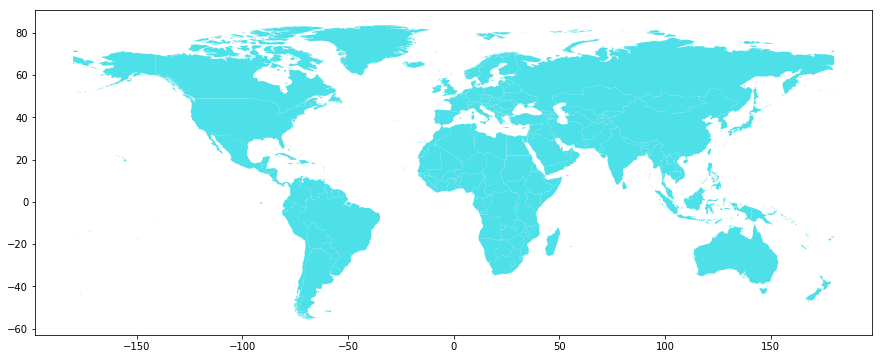

In [12]:
# View the plot of the geojson Polygon objects
earth.plot(figsize=(15,10), color='#4DE0E8')

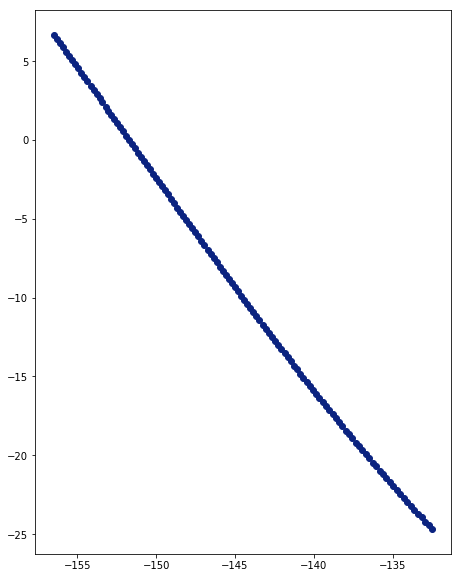

In [44]:
#Plot the ISS Path
geo_ISS.plot(figsize=(15,10), color='#0B2380')

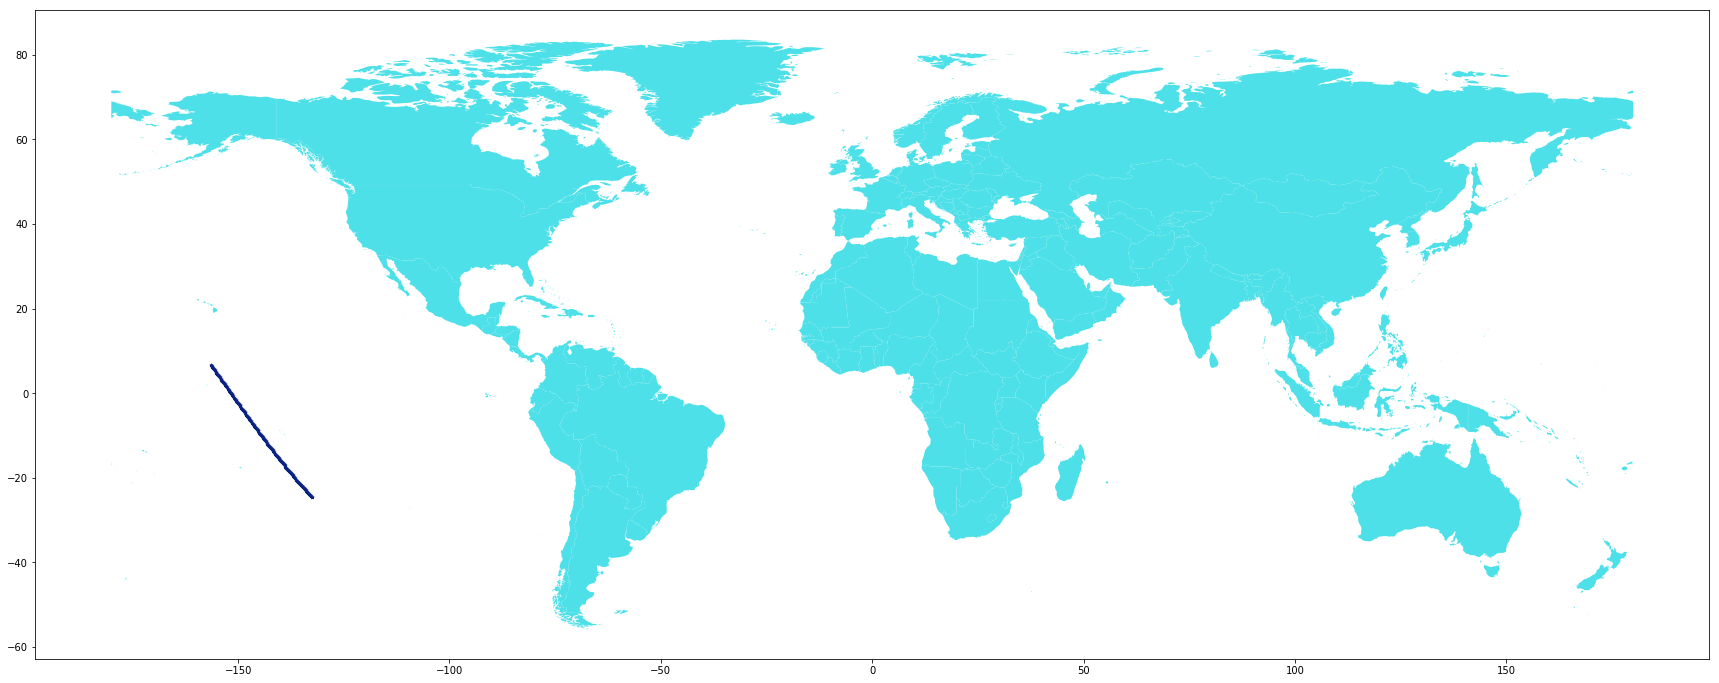

In [47]:
# Plotting to see the ISS overlay the world:
# make earth the base figure
fig, ax = plt.subplots(1, figsize=(30,20))
base = earth.plot(ax=ax, color='#4DE0E8')

# plotting the ISS position over the eart with navy
geo_ISS.plot(ax=base, color='#0B2380', marker="*", markersize=10);